<a name="top"></a>
# Analysis of the CFPB Consumer Complaint Database Data
### *Depository Institutions with Total Assets from \$12-16 billion*
Data provided by the [Consumer Finance Protection Bureau](https://www.consumerfinance.gov/).  
*This analysis uses work previously completed in CFPB-Consumer_Comp_DB.ipynb*  

Per the CFPB:

>**About the database**  
The Consumer Complaint Database is a collection of complaints about consumer financial products and services that we sent to companies for response. Complaints are published after the company responds, confirming a commercial relationship with the consumer, or after 15 days, whichever comes first. Complaints referred to other regulators, such as complaints about depository institutions with less than \$10 billion in assets, are not published in the Consumer Complaint Database. The database generally updates daily.

Click the link below to jump to the steps taken for this project:  
[Business Understanding](#business_understanding)  
[Data Understanding](#data_understanding)  
[Data Preparation](#data_prep)  
[Exploratory Analysis](#explore) (Tableau)  
[Deployment](#deploy)  (Tableau)

***
<a name="business_understanding"></a>
## Business Understanding
### Business Objective  
Utilizing data from the CFPB's Consumer Complaint Database, the business objective of this analysis is to determine key attributes of consumer complaints for the top 25 depository institutions regulated by the CFPB.

### Business Questions  

1. How many complaints has the CFPB handled for the top 25 depository institutions?  
2. What is the average amount of complaints recieved per 30 days and how does that compare to the most recent 30 days?
3. What are the most common issues reported by consumers?
4. What are the most common products that complaints are recieved for?
4. How does the complaint volume compare from year to year?  
5. Given that these top 25 depository institution's total assets are wide ranging, does an adjustment to asset size reveal that some companies have more complaints per $100 billion in total assets?  
    - Total asset size can be found at the CFPB's web page for "Institutions subject to CFPB supervisory authority" located [here](https://www.consumerfinance.gov/policy-compliance/guidance/supervision-examinations/institutions/).
    
[Back to Top](#top)

***
<a name="data_understanding"></a>
## Data Understanding
*(See CFPB-Consumer_Comp_DB.ipynb for the complete data understanding process used to examine the data in the Consumer Complaint Database.)*  

The primary resource used for this analysis into the business questions noted above in the [Business Understanding](#business_understanding) section will be the CFPB's Consumer Complaint Database dataset located [here](https://www.consumerfinance.gov/data-research/consumer-complaints/):

- [complaints.csv](#complaints) - A collection of complaints about consumer financial products and services that were sent to companies for response.

Per the CFPB Consumer Complaint Database page:

> **What you should consider when using the data**  
> This database is not a statistical sample of consumers’ experiences in the marketplace. Complaints are not necessarily representative of all consumers’ experiences and complaints do not constitute “information” for purposes of the Information Quality Act.
>
> Complaint volume should be considered in the context of company size and/or market share. For example, companies with more customers may have more complaints than companies with fewer customers. We encourage you to pair complaint data with public and private data sets for additional context.
>
>The Bureau publishes the consumer’s narrative description of his or her experience if the consumer opts to share it publicly and after the Bureau takes steps to remove personal information. We don’t verify all the allegations in complaint narratives. Unproven allegations in consumer narratives should be regarded as opinion, not fact. We do not adopt the views expressed and make no representation that consumers’ allegations are accurate, clear, complete, or unbiased in substance or presentation. Users should consider what conclusions may be fairly drawn from complaints alone.

And...

> **How we use complaint data**  
Complaints can give us insights into problems people are experiencing in the marketplace and help us regulate consumer financial products and services under existing federal consumer financial laws, enforce those laws judiciously, and educate and empower consumers to make informed financial decisions. We also report on complaint trends annually in Consumer Response’s Annual Report to Congress.

[Back to Top](#top)

***
<a name="complaints"></a>
### Exploring complaints.csv
Initial load of the complaints.csv file in order to learn what data has been provided by the CFPB.

[Back to Top](#top)

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

# Used for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# Filter to ignore math related warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [7]:
complaints = pd.read_csv('C:/Users/Leone/Desktop/CFPB/complaints.csv')

In [8]:
# Cleaning up the column names to make them easier to manage going forward
complaints.columns = complaints.columns.str.replace(' ', '_')

In [9]:
# Converting the 'Date_received' and 'Date_sent_to_company' columns to datetime dtype

complaints[['Date_received', 'Date_sent_to_company']] = complaints[['Date_received', 'Date_sent_to_company']].apply(pd.to_datetime)

complaints[['Date_received', 'Date_sent_to_company']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809406 entries, 0 to 1809405
Data columns (total 2 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date_received         datetime64[ns]
 1   Date_sent_to_company  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 27.6 MB


In [10]:
# Creating new df with unique values in the 'Company' column
companies_list = complaints['Company'].unique()
companies_df = pd.DataFrame({'Company': companies_list})
companies_df.shape

(5785, 1)

In [11]:
# Exporting dataframe to Excel
# companies_df.to_excel('companies_list.xlsx')

For the purposes of this data analysis, we will focus on the depository institutions with total assets ranging from &#0036;12-16 billion, represented on the CFPB's list of Depository Institutions subject to CFPB supervisory authority located [here](https://www.consumerfinance.gov/policy-compliance/guidance/supervision-examinations/institutions/).

These depository institutions are (in alphabetical order):

| **CFPB Depository List Company Name** | **DB Company Name** | **Total Assets** |
| :---: | :---: | ---: |
| ALLIANT CREDIT UNION | ALLIANT CREDIT UNION | &#0036;12,381,027,000 |
| AMERICA FIRST FEDERAL CREDIT UNION | AMERICA FIRST FEDERAL CREDIT UNION | &#0036;12,219,989,000 |
| APPLE BANK FOR SAVINGS | APPLE FINANCIAL HOLDINGS, INC. | &#0036;15,600,860,000 |
| BANNER BANK | BANNER CORPORATION | &#0036;12,490,581,000 |
| BERKSHIRE BANK | BERKSHIRE HILLS BANCORP, INC | &#0036;13,204,374,000 |
| BREMER BANK, NATIONAL ASSOCIATION | BREMER BANK, NATIONAL ASSOCIATION | &#0036;13,210,697,000 |
| CENTENNIAL BANK | HOME BANCSHARES, INC. | &#0036;15,500,274,000 |
| COLUMBIA STATE BANK | COLUMBIA BANKING SYSTEM, INC. | &#0036;14,030,107,000 |
| COMENITY BANK | Comenity Bank and Comenity Capital Bank | &#0036;12,143,555,000 |
| CUSTOMERS BANK | CUSTOMERS BANCORP, INC | &#0036;12,010,267,000 |
| EASTERN BANK | EASTERN BANK CORPORATION | &#0036;12,341,265,000 |
| FIRST FINANCIAL BANK | FIRST FINANCIAL BANCORP | &#0036;14,986,621,000 |
| FIRST INTERSTATE BANK | FIRST INTERSTATE BANCSYSTEM, INC. | &#0036;14,351,898,000 |
| FIRST MERCHANTS BANK | FIRST MERCHANTS CORPORATION | &#0036;12,670,437,000 |
| FIRST TECHNOLOGY FEDERAL CREDIT UNION | First Technology Federal Credit Union | &#0036;13,871,691,000 |
| FIRSTBANK PUERTO RICO | FIRSTBANK PUERTO RICO | &#0036;13,034,340,000 |
| GLACIER BANK | Glacier Bancorp Inc. | &#0036;15,147,427,000 |
| GOLDEN 1 CREDIT UNION, THE | GOLDEN 1 CREDIT UNION, THE | &#0036;13,854,012,000 |
| GREAT WESTERN BANK | GREAT WESTERN BANCORP, INC. | &#0036;12,385,469,000 |
| INDEPENDENT BANK | INDEPENDENT BANK CORP. | &#0036;15,568,677,000 |
| RENASANT BANK | RENASANT CORPORATION | &#0036;13,874,363,000 |
| STIFEL BANK AND TRUST | STIFEL FINANCIAL CORP. | &#0036;14,909,515,000 |
| THIRD FEDERAL SAVINGS & LOAN ASSOCIATION OF CLEVELAND | TFS FINANCIAL CORPORATION | &#0036;14,985,693,000 |
| TOWNEBANK | TOWNEBANK | &#0036;12,623,843,000 |
| TRUSTMARK NATIONAL BANK | TRUSTMARK CORPORATION | &#0036;14,017,762,000 |
| UNITED COMMUNITY BANK | UNITED COMMUNITY BANK | &#0036;13,058,533,000 |
| WESBANCO BANK, INC. | WESBANCO BANK, INC. | &#0036;15,964,561,000 |
| WILMINGTON SAVINGS FUND SOCIETY, FSB | WSFS FINANCIAL CORPORATION | &#0036;12,247,429,000 |

In [14]:
# Keeping only the depository institutions with total assets from $12-$16 billion

company_keep = ['ALLIANT CREDIT UNION', 'AMERICA FIRST FEDERAL CREDIT UNION', 'APPLE FINANCIAL HOLDINGS, INC.',
                'BANNER CORPORATION', 'BERKSHIRE HILLS BANCORP, INC', 'BREMER BANK, NATIONAL ASSOCIATION', 
                'HOME BANCSHARES, INC.', 'COLUMBIA BANKING SYSTEM, INC.', 'Comenity Bank', 'Comenity Capital Bank', 
                'CUSTOMERS BANCORP, INC', 'EASTERN BANK CORPORATION', 'FIRST FINANCIAL BANCORP', 'FIRST INTERSTATE BANCSYSTEM, INC.', 
                'FIRST MERCHANTS CORPORATION', 'First Technology Federal Credit Union', 'FIRSTBANK PUERTO RICO',
                'Glacier Bancorp Inc.', 'GOLDEN 1 CREDIT UNION, THE', 'GREAT WESTERN BANCORP, INC.', 'INDEPENDENT BANK CORP.', 
                'RENASANT CORPORATION', 'STIFEL FINANCIAL CORP.', 'TFS FINANCIAL CORPORATION', 'TOWNEBANK', 
                'TRUSTMARK CORPORATION', 'UNITED COMMUNITY BANK', 'WESBANCO BANK, INC.', 'WSFS FINANCIAL CORPORATION']

complaints_TA12to16 = complaints[complaints['Company'].isin(company_keep)].copy()
complaints_TA12to16['Company'].value_counts()

FIRSTBANK PUERTO RICO                    401
TFS FINANCIAL CORPORATION                219
GOLDEN 1 CREDIT UNION, THE               174
ALLIANT CREDIT UNION                     166
TRUSTMARK CORPORATION                    156
First Technology Federal Credit Union    142
APPLE FINANCIAL HOLDINGS, INC.           104
CUSTOMERS BANCORP, INC                    68
GREAT WESTERN BANCORP, INC.               63
AMERICA FIRST FEDERAL CREDIT UNION        59
WSFS FINANCIAL CORPORATION                59
FIRST INTERSTATE BANCSYSTEM, INC.         45
FIRST FINANCIAL BANCORP                   42
RENASANT CORPORATION                      41
BERKSHIRE HILLS BANCORP, INC              35
HOME BANCSHARES, INC.                     34
UNITED COMMUNITY BANK                     33
BANNER CORPORATION                        28
WESBANCO BANK, INC.                       24
COLUMBIA BANKING SYSTEM, INC.             22
Glacier Bancorp Inc.                      21
EASTERN BANK CORPORATION                  18
BREMER BAN

In [16]:
# Changing all 'Comenity Capital Bank' and 'Comenity Bank' values to be 'COMENITY BANK'
comenity_comp = ['Comenity Capital Bank', 'Comenity Bank']

complaints_TA12to16.loc[complaints_TA12to16['Company'].isin(comenity_comp), 'Company'] = 'COMENITY BANK'

complaints_TA12to16['Company'].value_counts()

FIRSTBANK PUERTO RICO                    401
TFS FINANCIAL CORPORATION                219
GOLDEN 1 CREDIT UNION, THE               174
ALLIANT CREDIT UNION                     166
TRUSTMARK CORPORATION                    156
First Technology Federal Credit Union    142
APPLE FINANCIAL HOLDINGS, INC.           104
CUSTOMERS BANCORP, INC                    68
GREAT WESTERN BANCORP, INC.               63
WSFS FINANCIAL CORPORATION                59
AMERICA FIRST FEDERAL CREDIT UNION        59
FIRST INTERSTATE BANCSYSTEM, INC.         45
FIRST FINANCIAL BANCORP                   42
RENASANT CORPORATION                      41
BERKSHIRE HILLS BANCORP, INC              35
HOME BANCSHARES, INC.                     34
UNITED COMMUNITY BANK                     33
BANNER CORPORATION                        28
WESBANCO BANK, INC.                       24
COLUMBIA BANKING SYSTEM, INC.             22
Glacier Bancorp Inc.                      21
EASTERN BANK CORPORATION                  18
BREMER BAN

***
<a name="data_prep"></a>
## Data Preparation
In this section, we will take learnings along with data preparation tasks from the Data Understanding step above in order to create functions that will make the data prepararation repeatable for future use.

[Back to Top](#top)

### Data Load and Clean Functions

In [17]:
def complaints_df():

    # Creating our dataframe from complaints.csv
    complaints = pd.read_csv('C:/Users/Leone/Desktop/CFPB/complaints.csv',
                             usecols=['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
                                      'Consumer complaint narrative', 'Company public response', 'Company', 'State',
                                      'Tags', 'Submitted via', 'Date sent to company', 'Company response to consumer',
                                      'Timely response?', 'Consumer disputed?', 'Complaint ID'])

    return complaints


def create_complaints_df():

    # Create the complaints dataframe
    complaints = complaints_df()

    # Clean up the column names to make them easier to manage going forward
    complaints.columns = complaints.columns.str.replace(' ', '_')

    # Keep only the top 25 depository institutions based on total assets
    company_keep = ['ALLIANT CREDIT UNION', 'AMERICA FIRST FEDERAL CREDIT UNION', 'APPLE FINANCIAL HOLDINGS, INC.',
                    'BANNER CORPORATION', 'BERKSHIRE HILLS BANCORP, INC', 'BREMER BANK, NATIONAL ASSOCIATION', 
                    'HOME BANCSHARES, INC.', 'COLUMBIA BANKING SYSTEM, INC.', 'Comenity Bank', 'Comenity Capital Bank', 
                    'CUSTOMERS BANCORP, INC', 'EASTERN BANK CORPORATION', 'FIRST FINANCIAL BANCORP', 'FIRST INTERSTATE BANCSYSTEM, INC.', 
                    'FIRST MERCHANTS CORPORATION', 'First Technology Federal Credit Union', 'FIRSTBANK PUERTO RICO',
                    'Glacier Bancorp Inc.', 'GOLDEN 1 CREDIT UNION, THE', 'GREAT WESTERN BANCORP, INC.', 'INDEPENDENT BANK CORP.', 
                    'RENASANT CORPORATION', 'STIFEL FINANCIAL CORP.', 'TFS FINANCIAL CORPORATION', 'TOWNEBANK', 
                    'TRUSTMARK CORPORATION', 'UNITED COMMUNITY BANK', 'WESBANCO BANK, INC.', 'WSFS FINANCIAL CORPORATION']
    complaints = complaints[complaints['Company'].isin(company_keep)]
    # Changing all 'Comenity Capital Bank' and 'Comenity Bank' values to be 'COMENITY BANK'
    comenity_comp = ['Comenity Capital Bank', 'Comenity Bank']
    complaints.loc[complaints['Company'].isin(comenity_comp), 'Company'] = 'COMENITY BANK'

    # Changing all 'SUNTRUST BANKS, INC.' and 'BB&T CORPORATION' values to be 'TRUIST FINANCIAL CORPORATION'
    former_comp = ['SUNTRUST BANKS, INC.', 'BB&T CORPORATION']
    complaints.loc[complaints['Company'].isin(former_comp), 'Company'] = 'TRUIST FINANCIAL CORPORATION'

    # Convert the 'Date_received' and 'Date_sent_to_company' columns to datetime dtype
    complaints[['Date_received', 'Date_sent_to_company']] = complaints[['Date_received', 'Date_sent_to_company']].apply(pd.to_datetime)

    # Handle NaN values
    complaints = complaints_nan(complaints)
    
    # Change all values in the 'State' column that are not a state, "DC", or "UNKNOWN" to be "OTHER" 
    states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
          'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
          'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', "UNKNOWN"]

    complaints.loc[~complaints['State'].isin(states), 'State'] = 'OTHER'

    return complaints


def complaints_nan(complaints):

    # Handle NaN values in the 'State' column by imputing them with "UNKNOWN"
    complaints['State'].fillna('UNKNOWN', inplace=True)

    # Handle NaN values in the 'Issue', 'Sub-product', 'Sub-issue', and 'State' columns by imputing them with "NONE ENTERED"
    nan_col = ['Issue', 'Sub-product', 'Sub-issue', 'State']
    for col in nan_col:
        complaints[col].fillna('NONE ENTERED', inplace=True)

    # Handle NaN values in the 'Consumer_disputed?' columns by imputing them with "NO CONSUMER RESPONSE"
    complaints['Consumer_disputed?'].fillna("NO CONSUMER RESPONSE", inplace=True)

    return complaints

In [18]:
complaints = create_complaints_df()

In [19]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 1092 to 1809324
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date_received                 2004 non-null   datetime64[ns]
 1   Product                       2004 non-null   object        
 2   Sub-product                   2004 non-null   object        
 3   Issue                         2004 non-null   object        
 4   Sub-issue                     2004 non-null   object        
 5   Consumer_complaint_narrative  579 non-null    object        
 6   Company_public_response       865 non-null    object        
 7   Company                       2004 non-null   object        
 8   State                         2004 non-null   object        
 9   Tags                          295 non-null    object        
 10  Submitted_via                 2004 non-null   object        
 11  Date_sent_to_company    

In [20]:
# Exporting dataframe to an Excel file
complaints.to_excel('complaints-TA12-16.xlsx')

***
<a name="explore"></a>
## Exploratory Analysis
### Tableau  
Exploratory analysis of our dataset will be handled in Tableau for the remaining steps of this project.  

https://public.tableau.com/views/CFPBAnalysis-TEST/CFPBAnalysis?:language=en&:display_count=y&publish=yes&:origin=viz_share_link
    
[Back to Top](#top)

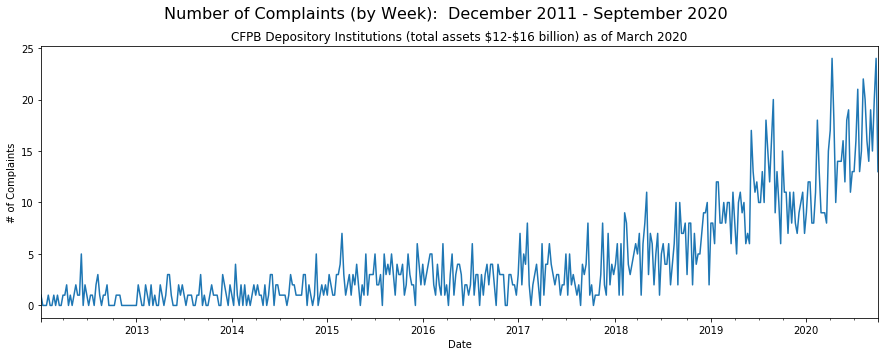

In [23]:
### Complaint Volume 12/2011 through 09/2020 - Line Graph
# Plotting a line graph to show the weekly volume of complaints from 12/2011 through 09/2020
fig, ax = plt.subplots(figsize=(15, 11))
comp_graph = complaints[['Date_received', 'Complaint_ID']].copy()

# Filter by date range so that the visualization covers exact weeks with no partial weeks
comp_graph = comp_graph[(comp_graph['Date_received'] > '2011-12-04') & (comp_graph['Date_received'] < '2020-10-03')]

count_by_date = comp_graph.groupby(['Date_received'])['Complaint_ID'].size()

plt.subplot(211)

# Resample time series to weekly for easier visualization
count_by_date.resample('W').sum().plot()

plt.xlabel('Date')
plt.ylabel('# of Complaints')
plt.suptitle('Number of Complaints (by Week):  December 2011 - September 2020', y=0.93, fontsize=16)
plt.title('CFPB Depository Institutions (total assets \$12-\$16 billion) as of March 2020');

# plt.savefig('AVG_List_Price', bbox_inches='tight');